## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [3]:
str_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']    # specify columns you want to replace
diabetes_data[str_cols] = diabetes_data[str_cols].replace(0.000000, np.nan)

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


**<font color='teal'> Plot histograms of each column. </font>**

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

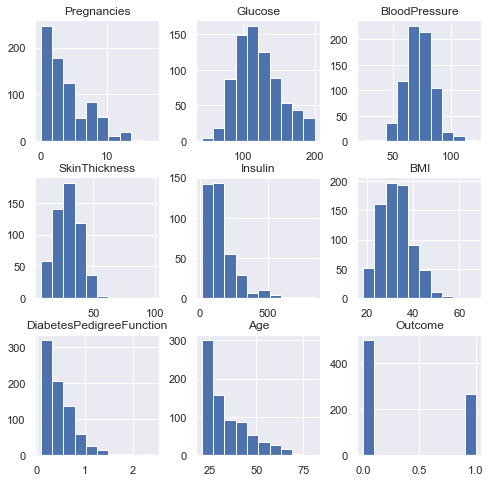

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(3,3,figsize=(8, 8))
diabetes_data.hist(ax=axis)

#### Replace the zeros with mean and median values.

In [5]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

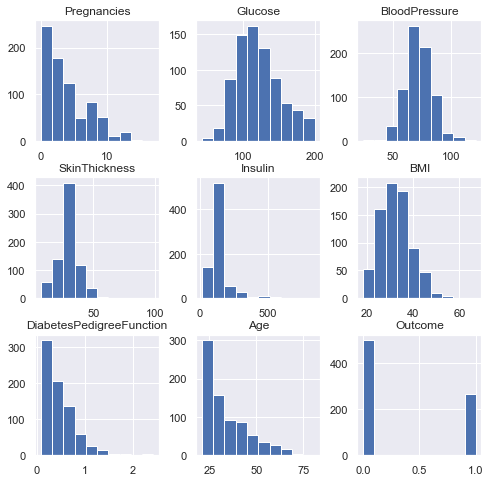

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(3,3,figsize=(8, 8))
diabetes_data.hist(ax=axis)

#### Plot the correlation matrix heatmap

Correlation between various features


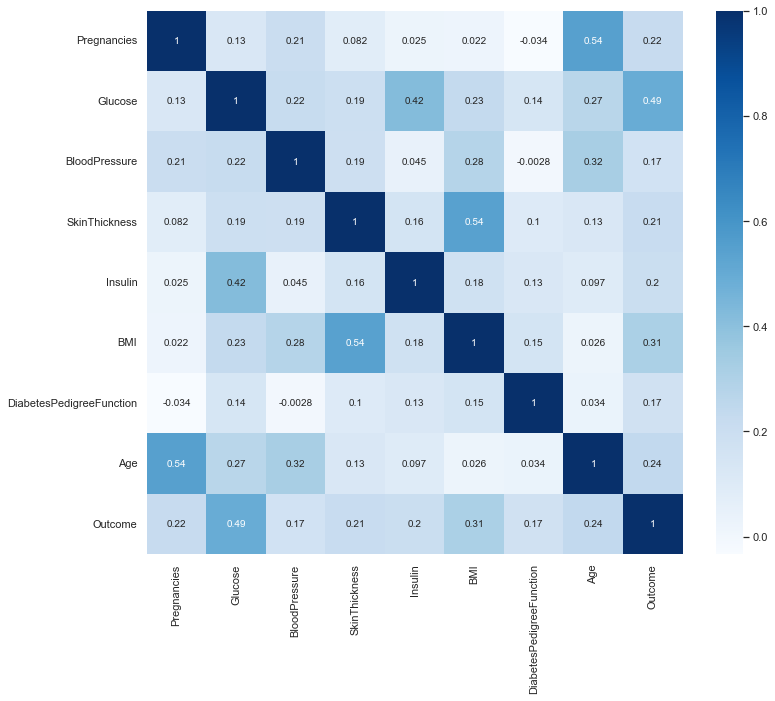

In [10]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [7]:
y = diabetes_data['Outcome']
X = diabetes_data.loc[:, diabetes_data.columns != 'Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [9]:
# define scaler
scaler = StandardScaler()

# fit scale_df
scaler.fit(X_train)

# transform the data using fitted scaler
#scaled_df = scaler.transform(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# make it dataframe
# scaled_df = pd.DataFrame(scaled_df, columns=names_list_SS) 


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [10]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [11]:
print(train_scores)

[1.0, 0.8417132216014898, 0.8305400372439479, 0.8063314711359404, 0.8044692737430168, 0.7914338919925512, 0.7951582867783985, 0.7839851024208566, 0.8044692737430168]


**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [12]:
for i in range(1,10):
    print(f"When K={i}, train score is {train_scores[i-1]} and test score is {test_scores[i-1]}.")

When K=1, train score is 1.0 and test score is 0.70995670995671.
When K=2, train score is 0.8417132216014898 and test score is 0.7359307359307359.
When K=3, train score is 0.8305400372439479 and test score is 0.7748917748917749.
When K=4, train score is 0.8063314711359404 and test score is 0.7662337662337663.
When K=5, train score is 0.8044692737430168 and test score is 0.7748917748917749.
When K=6, train score is 0.7914338919925512 and test score is 0.7792207792207793.
When K=7, train score is 0.7951582867783985 and test score is 0.7835497835497836.
When K=8, train score is 0.7839851024208566 and test score is 0.7835497835497836.
When K=9, train score is 0.8044692737430168 and test score is 0.7922077922077922.


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

According to above print output, max score in the training dataset was K=1.

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

According to above print output, max score in the testing dataset was K=9.

Plot the train and test model performance by number of neighbors.

/Users/hansangjun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hansangjun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


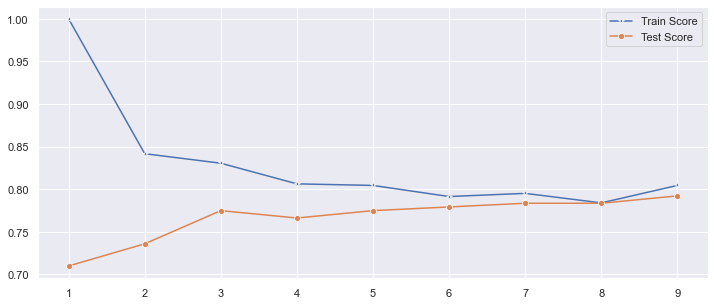

In [13]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [14]:
# I would choose k=9.
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)

print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))


0.8044692737430168
0.7922077922077922


In [15]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

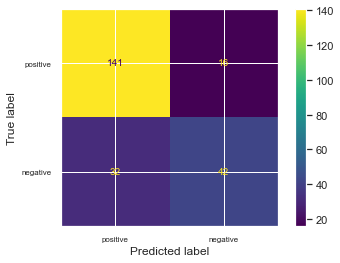

In [16]:
cm = confusion_matrix(y_test, y_pred, labels = knn.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['positive', 'negative'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['positive', 'negative'], fontsize = 8)
ax.set_yticklabels(labels = ['positive', 'negative'], fontsize = 8)
display_cm.plot(ax = ax)

**<font color='teal'> Print the classification report </font>**

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       157
           1       0.72      0.57      0.64        74

    accuracy                           0.79       231
   macro avg       0.77      0.73      0.75       231
weighted avg       0.79      0.79      0.78       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [58]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7709415022499135
Best Parameters: {'n_neighbors': 20}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed.

HOWEVER, WHAT I RECEIVE IS 20.

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200, 500, 1000]}
#rf = KNeighborsClassifier()
model_cv= GridSearchCV(model, param_grid, cv=5)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [100, 200, 500, 1000]})

In [25]:
print("Best Score:" + str(model_cv.best_score_))
print("Best Parameters: " + str(model_cv.best_params_))

Best Score:0.7541709934233298
Best Parameters: {'n_estimators': 200}


In [75]:
from bayes_opt import BayesianOptimization

In [76]:

def objective(nn):
    regressor = KNeighborsClassifier(
                      int(nn))
    regressor.fit(X_train, y_train)

    return regressor.score(X_test, y_test)

In [77]:
search_space = {
    "nn": (1, 50)
}

In [78]:
optimizer = BayesianOptimization(
                                f=objective,
                                pbounds=search_space,
                                random_state=123
                              )

In [79]:
optimizer.maximize()

|   iter    |  target   |    nn     |
-------------------------------------
|  1        |  0.7576   |  35.13    |
|  2        |  0.7922   |  15.02    |
|  3        |  0.7749   |  12.12    |
|  4        |  0.7706   |  28.01    |
|  5        |  0.7532   |  36.25    |
|  6        |  0.7619   |  18.15    |
|  7        |  0.7965   |  13.96    |
|  8        |  0.7532   |  49.99    |
|  9        |  0.71     |  1.005    |
|  10       |  0.7662   |  43.48    |
|  11       |  0.7619   |  23.75    |
|  12       |  0.7835   |  31.19    |
|  13       |  0.7835   |  7.393    |
|  14       |  0.7619   |  40.34    |
|  15       |  0.7922   |  9.177    |
|  16       |  0.7749   |  46.45    |
|  17       |  0.7792   |  32.65    |
|  18       |  0.7706   |  21.05    |
|  19       |  0.7879   |  14.38    |
|  20       |  0.7792   |  16.15    |
|  21       |  0.7835   |  10.3     |
|  22       |  0.7749   |  5.561    |
|  23       |  0.7965   |  13.22    |
|  24       |  0.7619   |  29.77    |
|  25       

In [81]:
optimizer.max

{'target': 0.7965367965367965, 'params': {'nn': 13.957486648689146}}